In [25]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [26]:
tf.__version__

'2.4.1'

In [9]:

train=tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\parvp\Downloads\RicknMorty',
                                                          labels='inferred',
                                                          label_mode='categorical',
                                                          class_names=["Meeseeks","Morty","Poopybutthole","Rick","Summer"],
                                                          batch_size=10,
                                                          image_size=(28,28),
                                                          shuffle=True,
                                                          seed=32,
                                                          validation_split=0.2,
                                                          subset="training"
)
test=tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\parvp\Downloads\RicknMorty',
                                                          labels='inferred',
                                                          label_mode='categorical',
                                                          class_names=["Meeseeks","Morty","Poopybutthole","Rick","Summer"],
                                                          batch_size=10,
                                                          image_size=(28,28),
                                                          shuffle=True,
                                                          seed=32,
                                                          validation_split=0.2,
                                                          subset="validation"
)

Found 838 files belonging to 5 classes.
Using 671 files for training.
Found 838 files belonging to 5 classes.
Using 167 files for validation.


In [10]:
train

<BatchDataset shapes: ((None, 28, 28, 3), (None, 5)), types: (tf.float32, tf.float32)>

In [40]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28,28, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(axis=-1),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(axis=-1),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(axis=-1),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(axis=-1),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(5)
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 14, 32)       

In [44]:
history=model.fit(train,validation_data=test,epochs=100)

Epoch 1/100
68/68 [==============================] - 6s 87ms/step - loss: 0.6755 - accuracy: 0.7198 - val_loss: 0.6306 - val_accuracy: 0.6826
Epoch 2/100
68/68 [==============================] - 7s 93ms/step - loss: 0.5941 - accuracy: 0.7511 - val_loss: 0.5963 - val_accuracy: 0.7066
Epoch 3/100
68/68 [==============================] - 7s 91ms/step - loss: 0.5963 - accuracy: 0.7571 - val_loss: 0.6859 - val_accuracy: 0.6647
Epoch 4/100
68/68 [==============================] - 7s 91ms/step - loss: 0.5970 - accuracy: 0.7630 - val_loss: 0.6749 - val_accuracy: 0.6946
Epoch 5/100
68/68 [==============================] - 6s 88ms/step - loss: 0.5880 - accuracy: 0.7571 - val_loss: 0.5787 - val_accuracy: 0.7126
Epoch 6/100
68/68 [==============================] - 6s 87ms/step - loss: 0.5735 - accuracy: 0.7660 - val_loss: 0.6578 - val_accuracy: 0.6886
Epoch 7/100
68/68 [==============================] - 6s 88ms/step - loss: 0.5644 - accuracy: 0.7705 - val_loss: 0.6017 - val_accuracy: 0.7066
Epoch 

Text(0.5, 1.0, 'loss')

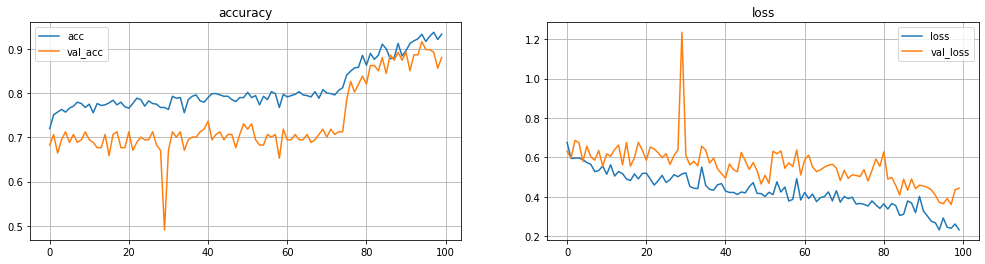

In [45]:
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [2]:
from tensorflow.keras.models import load_model

# Saving all model
model.save('RickandMorty.h5')

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.models import load_model
model.load(''RickandMorty.h5')